#### Student Name: Mai Ngo
#### Course Name and Number: CSC 583 Natural Language Processing
#### Assignment 1 - Text Preprocessing
#### Date: 9/18/2024

### Task 1 -- Using 'sample_2024.txt'

In [1]:
import requests
import re
from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize
import matplotlib.pyplot as plt
import numpy as np

#### Read file.

In [2]:
fileURL1 = 'https://condor.depaul.edu/ntomuro/courses/583/2024fall/assign/HW1/hw1files/sample_2024.txt'

def paragraphNum(fileURL, encoding = None):
    '''Takes a URL of a text file and return number of paragraphs.'''
    response = requests.get(fileURL)
    if response.status_code == 200:
        if encoding:
            content = response.content.decode(encoding)
        else:
            #Whole content as a string.                                                                                                                    
            content = response.text
        ###After reading raw content, it shows that paragraphs are separted not only by double new line characters '\n\n', but also cases where there are white spaces before, after, or in between. 
        #--\s*-- Matches any amount of white space. 
        paragraphList = re.split(r'\s*\n\s*\n\s*', content.strip())
        #Get paragraph count. 
        paragraphNum = len(paragraphList)
        print(f'# of paragraphs = {paragraphNum}')
        return paragraphNum, paragraphList, content
    else:
        print(f"Not working!")

paragraphNum1, paragraphList1, content1 = paragraphNum(fileURL1)

# of paragraphs = 8


In [3]:
def sentenceNum(textContent):
    '''Takes content of a text file and return number of sentences.'''
    #Special condition: Apply sent_tokenize where, it only separates if the first character of the next 'separated' sentence is capitalized. Otherwise it stays together.
    orig_sentenceList = sent_tokenize(textContent, language='english')
    sentenceList = []
    
    #Iterate through sentences and combine based on capitalization.
    i = 0
    while i < len(orig_sentenceList):
        #If the next sentence starts with a capital letter, keep them separate.
        if i + 1 < len(orig_sentenceList) and orig_sentenceList[i + 1][0].isupper():
            sentenceList.append(orig_sentenceList[i])
        else:
            #Apply condition: Combine sentences that next one does not start with a capital letter.
            combinedSentence = orig_sentenceList[i]
            while i + 1 < len(orig_sentenceList) and not orig_sentenceList[i + 1][0].isupper():
                combinedSentence += ' ' + orig_sentenceList[i + 1]
                i += 1
            sentenceList.append(combinedSentence)
        i += 1
    sentenceCount = len(sentenceList)
    print(f'# of sentences = {sentenceCount}')
    return sentenceList, sentenceCount
    
sentenceList1, sentenceNum1 = sentenceNum(content1)

# of sentences = 31


In [4]:
def getTokens(sentenceList):
    '''Take a list of sentences and returns total and unique number of tokens.'''
    #Contraction dictionary.
    contractionList = {
        "let's": " let us ",
        "won't": " will not ",
        "can't": " can not ",
        "shan't": " shall not ",
        "wouldn't've": " would not have ",
        "n't": " not ",
        "'ll": " will ",
        "'ve": " have ",
        "'d": " would ",
        "'re ": " are ",
        "'s": " is ",
        "i'm": " i am "}

    #Store cleaned tokens.
    masterToken = []
    #Count number of tokens.
    counter = 0
    #Store token frequecy. 
    res = {}

    #Iterate through each sentence. 
    for sentence in sentenceList:
        sentence = sentence.lower()  
    
        #If any word in a sentence match a key in the contracttion list, replace with value using Regex. 
        for contraction, replacement in contractionList.items():
            #--\b-- Matches position from start to end. EXACT word. Ex: "let's" to 'let' and 'us'.
            sentence = re.sub(r'\b' + re.escape(contraction) + r'\b', replacement, sentence)
            #--\W*-- Matches contraction WITHIN a word. Except for word starts with punctuation. 
            sentence = re.sub(r"(?<!\')\W*" + re.escape(contraction) + r"\b", replacement, sentence)
        
        #Apply word tokenization after expanding all contractions.
        tokenList = word_tokenize(sentence)
        for token in tokenList:
            #Further punctuation clean: 'e.g.', 'feb.', '.have' -- manually. 
            if re.match(r'^\w+\.\w+\.$', token) or re.match(r'^\w+\.$', token):
                masterToken.append(token[:-1])  
                masterToken.append('.')  
            elif re.match(r"^'\w+", token):
                masterToken.append(token[1:])
                masterToken.append("'")
            else:
                masterToken.append(token)  
    #Count tokens.            
    for token in masterToken:
        if token in res:
            res[token] += 1
        else: 
            res[token] = 1

    uniqueToken = len(set(masterToken))
    tokenNum = len(masterToken)
    print(f'# of tokens = {tokenNum}')
    print(f'# of unique tokens = {uniqueToken}')
    return res, uniqueToken, tokenNum

tokenDict1, uniqueToken1, tokenNum1 = getTokens(sentenceList1)

# of tokens = 567
# of unique tokens = 273


#### Write output.

In [5]:
#Primary sort: value in descending order.
#Secondary sort: key in alphabetical order.
sorted_tokenDict1 = sorted(tokenDict1.items(), key=lambda item: (-item[1], item[0]))
with open('task1-output.txt', 'w') as outFile:
    outFile.write(f'# of paragraphs = {paragraphNum1}\n')
    outFile.write(f'# of sentences = {sentenceNum1}\n')
    outFile.write(f'# of tokens = {tokenNum1}\n')
    outFile.write(f'# of unique tokens = {uniqueToken1}\n')
    outFile.write("="*36 + "\n")

    for index, (key, value) in enumerate(sorted_tokenDict1, start=1):
        outFile.write(f"{index}: {key}  {value}\n")
print(f"Successfully written!")

Successfully written!


### Task 2 -- Using 'war-and-peace.txt'

In [6]:
fileURL2 = 'https://condor.depaul.edu/ntomuro/courses/583/2024fall/assign/HW1/hw1files/war-and-peace.txt'
paragraphNum2, paragraphList2, content2 = paragraphNum(fileURL2, encoding = 'utf-8-sig')

# of paragraphs = 12169


In [7]:
#Store original sentences resulted from sent_tokenization. 33,553 sentences. 
sentFilter = []
for paragraph in paragraphList2: 
    sentences = sent_tokenize(paragraph)
    sentFilter.extend(sentences)

#Further split. Conditions: A punctuation follows by n-white spaces and an uppercase letter. 34,052 sentences.
sentFilter2 = []
for sentence in sentFilter:
    #--(?<=[.!?\'"\'])-- Matches any punctuation.
    #--\s+-- Matches any amount of white spaces.
    #--(?=[A-Z])-- Matches any uppercase letter.
    pattern = r'(?<=[.!?\'"\'])\s+(?=[A-Z])'
    parts = re.split(pattern, sentence)  
    sentFilter2.extend([part for part in parts])

In [8]:
i = 0
#Re-combine sentences - Same logic as task 1, only separates if the first character of the next 'separated' sentence is capitalized. Otherwise it stays together.
sentenceList2 = []
while i < len(sentFilter2):
    if i + 1 < len(sentFilter2) and (sentFilter2[i + 1][0].isupper()):
        sentenceList2.append(sentFilter2[i])
    else:
        combinedSentence = sentFilter2[i]
        while i + 1 < len(sentFilter2) and sentFilter2[i + 1][0].islower():
            combinedSentence += ' ' + sentFilter2[i + 1]
            i += 1
        sentenceList2.append(combinedSentence)
    i += 1
    
#Get sentence count. 
sentenceNum2 = len(sentenceList2)
print(f'# of sentences = {sentenceNum2}')

# of sentences = 31580


In [9]:
tokenDict2, uniqueToken2, tokenNum2 = getTokens(sentenceList2)

# of tokens = 673063
# of unique tokens = 18417


#### Write output.

In [10]:
#Primary sort: value in descending order.
#Secondary sort: key in alphabetical order.
sorted_tokenDict2 = sorted(tokenDict2.items(), key=lambda item: (-item[1], item[0]))

with open('task2-output.txt', 'w', encoding='utf-8') as outFile:
    outFile.write(f'# of paragraphs = {paragraphNum2}\n')
    outFile.write(f'# of sentences = {sentenceNum2}\n')
    outFile.write(f'# of tokens = {tokenNum2}\n')
    outFile.write(f'# of unique tokens = {uniqueToken2}\n')
    outFile.write("="*36 + "\n")

    for index, (key, value) in enumerate(sorted_tokenDict2, start=1):
        outFile.write(f"{index}: {key}  {value}\n")
print(f"Successfully written!")

Successfully written!


#### Zipf\'s Law Chart.

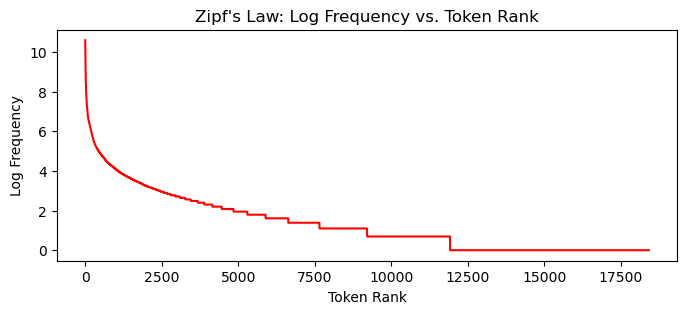

In [11]:
#Logic: Plot the rank in descending order againsts its frequency (in nautral log).
words, freqs = zip(*sorted_tokenDict2)
ranks = np.arange(1, len(freqs) + 1)
#Natural log calculation.
logFreq = np.log(freqs)

plt.figure(figsize=(8, 3))
plt.plot(ranks, logFreq, color='red')
plt.title('Zipf\'s Law: Log Frequency vs. Token Rank')
plt.xlabel('Token Rank')
plt.ylabel('Log Frequency')
plt.show()